# Import Data

In [2]:
#imports - numpy, padas, scipy, math, matplotlib
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import scipy
from math import sqrt


#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn import linear_model
from sklearn import grid_search


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

#cross validation and RFE
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.learning_curve import validation_curve
from sklearn.cross_validation import KFold
from sklearn import preprocessing

#style
%matplotlib inline
sns.set_style("white")
sns.set_context("talk")

In [3]:
fb = pd.read_csv('dataset_Facebook.csv', sep=';')

# Understand data structure

In [4]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

### Remove Spaces from Column Names

In [5]:
fb.columns = [c.replace(' ', '_') for c in fb.columns]
header = fb.dtypes.index
print(header)

Index(['Page_total_likes', 'Type', 'Category', 'Post_Month', 'Post_Weekday',
       'Post_Hour', 'Paid', 'Lifetime_Post_Total_Reach',
       'Lifetime_Post_Total_Impressions', 'Lifetime_Engaged_Users',
       'Lifetime_Post_Consumers', 'Lifetime_Post_Consumptions',
       'Lifetime_Post_Impressions_by_people_who_have_liked_your_Page',
       'Lifetime_Post_reach_by_people_who_like_your_Page',
       'Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post',
       'comment', 'like', 'share', 'Total_Interactions'],
      dtype='object')


### Replace Object and Float with int

In [6]:
fb.Type = fb.Type.replace('Link',1)
fb.Type = fb.Type.replace('Photo',2)
fb.Type = fb.Type.replace('Status',3)
fb.Type = fb.Type.replace('Video',4)

In [7]:
fb = fb.fillna(0)

In [8]:
fb.Paid = fb['Paid'].astype(np.int64)

In [9]:
fb.head()

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
0,139441,2,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,3,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,2,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [10]:
fb.describe()

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,123194.176000,2.074000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.590000,27.048000,212.120000
std,16272.813214,0.429993,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.172528,42.511742,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,2.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.000000,10.000000,71.000000
50%,129600.000000,2.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,2.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000
max,139441.000000,4.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [11]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page_total_likes                                                       500 non-null int64
Type                                                                   500 non-null int64
Category                                                               500 non-null int64
Post_Month                                                             500 non-null int64
Post_Weekday                                                           500 non-null int64
Post_Hour                                                              500 non-null int64
Paid                                                                   500 non-null int64
Lifetime_Post_Total_Reach                                              500 non-null int64
Lifetime_Post_Total_Impressions                                        500 non-null int64
Lifetime_Engaged_Users                                                 500 non-null i

### Correlation and Covariance

In [12]:
corrMat = fb.corr()
print(corrMat)

                                                    Page_total_likes  \
Page_total_likes                                            1.000000   
Type                                                        0.212267   
Category                                                   -0.091142   
Post_Month                                                  0.941192   
Post_Weekday                                               -0.005401   
Post_Hour                                                  -0.143807   
Paid                                                        0.008503   
Lifetime_Post_Total_Reach                                  -0.083245   
Lifetime_Post_Total_Impressions                            -0.102540   
Lifetime_Engaged_Users                                     -0.111922   
Lifetime_Post_Consumers                                    -0.149129   
Lifetime_Post_Consumptions                                 -0.128240   
Lifetime_Post_Impressions_by_people_who_have_li...         -0.09

In [13]:
covMat = fb.cov()
print(covMat)

                                                    Page_total_likes  \
Page_total_likes                                        2.648044e+08   
Type                                                    1.485272e+03   
Category                                               -1.264636e+03   
Post_Month                                              5.066380e+04   
Post_Weekday                                           -1.784834e+02   
Post_Hour                                              -1.022315e+04   
Paid                                                    6.205117e+01   
Lifetime_Post_Total_Reach                              -3.080520e+07   
Lifetime_Post_Total_Impressions                        -1.281554e+08   
Lifetime_Engaged_Users                                 -1.793994e+06   
Lifetime_Post_Consumers                                -2.141616e+06   
Lifetime_Post_Consumptions                             -4.174891e+06   
Lifetime_Post_Impressions_by_people_who_have_li...     -9.351074

# Type & Paid

Type
1     22
2    426
3     45
4      7
Name: Type, dtype: int64

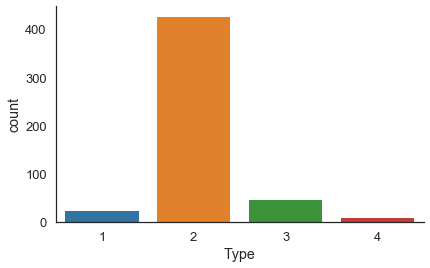

In [14]:
fg = sns.factorplot('Type', data=fb, kind='count', aspect=1.5)
fg.set_xlabels('Type')
fb.groupby('Type')['Type'].count()

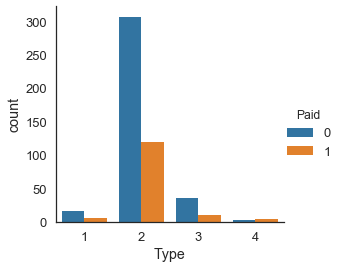

In [15]:
g = sns.factorplot('Type', data=fb, hue='Paid', kind='count', aspect=1.0)
g.set_xlabels('Type')

Text(0.5,1,"Distribution of Posts' Type")

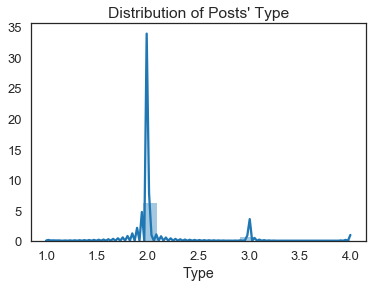

In [16]:
type = fb['Type'].dropna()
type_dist = sns.distplot(type)
type_dist.set_title("Distribution of Posts' Type")

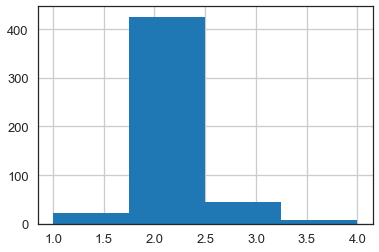

In [17]:
fb['Type'].hist(bins=4)

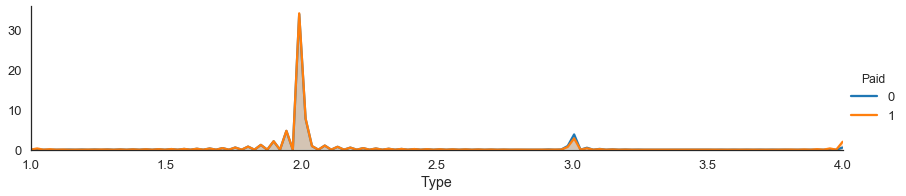

In [18]:
fig = sns.FacetGrid(fb, hue='Paid', aspect=4)
fig.map(sns.kdeplot, 'Type', shade=True)
oldest = fb['Type'].max()
fig.set(xlim=(1,oldest))
fig.add_legend()

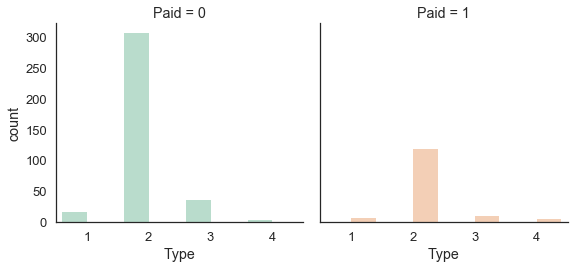

In [19]:
sns.factorplot('Type', data=fb, hue='Paid', kind='count', palette='Pastel2', hue_order=range(0,2),
              col='Paid')

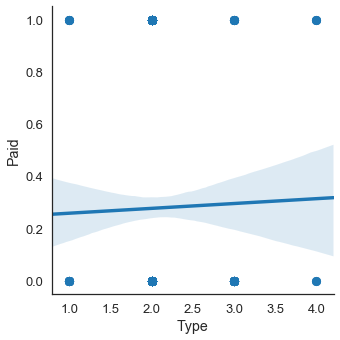

In [20]:
sns.lmplot('Type', 'Paid', data=fb)

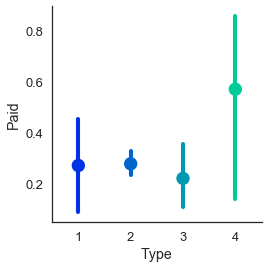

In [21]:
sns.factorplot('Type', 'Paid', data=fb, palette='winter')

# Category and Paid

Category
1    215
2    130
3    155
Name: Category, dtype: int64

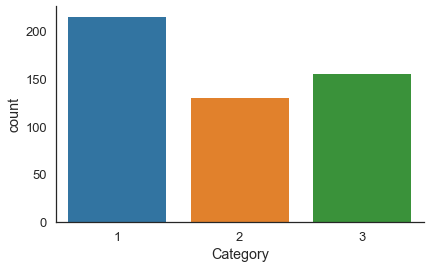

In [22]:
fg = sns.factorplot('Category', data=fb, kind='count', aspect=1.5)
fg.set_xlabels('Category')
fb.groupby('Category')['Category'].count()

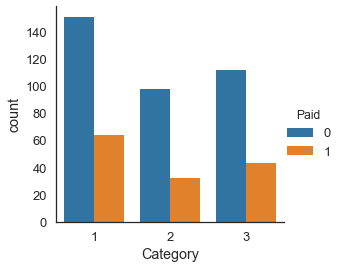

In [23]:
g = sns.factorplot('Category', data=fb, hue='Paid', kind='count', aspect=1.0)
g.set_xlabels('Category')

Text(0.5,1,"Distribution of Posts' Category")

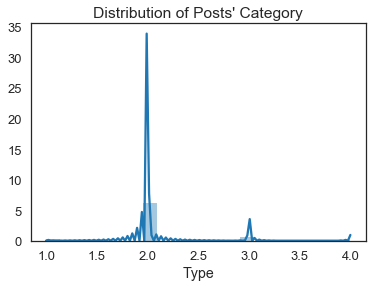

In [24]:
category = fb['Category'].dropna()
category_dist = sns.distplot(type)
category_dist.set_title("Distribution of Posts' Category")

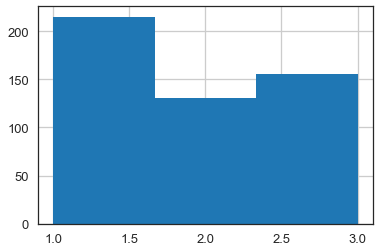

In [25]:
fb['Category'].hist(bins=3)

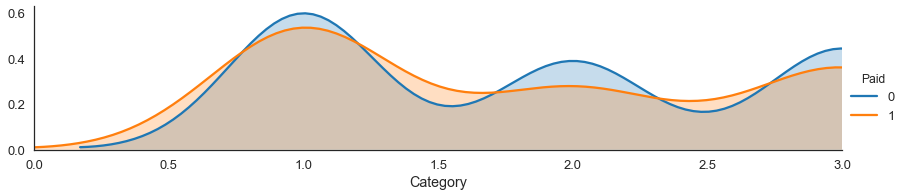

In [26]:
fig = sns.FacetGrid(fb, hue='Paid', aspect=4)
fig.map(sns.kdeplot, 'Category', shade=True)
oldest = fb['Category'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

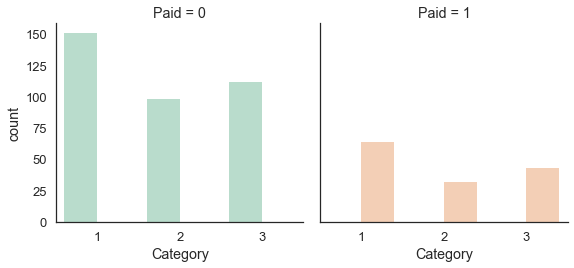

In [27]:
sns.factorplot('Category', data=fb, hue='Paid', kind='count', palette='Pastel2', hue_order=range(0,2),
              col='Paid')

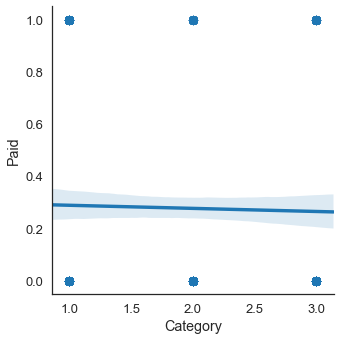

In [28]:
sns.lmplot('Category', 'Paid', data=fb)

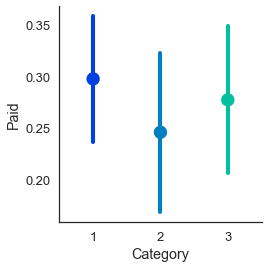

In [29]:
sns.factorplot('Category', 'Paid', data=fb, palette='winter')

# Page Total Likes

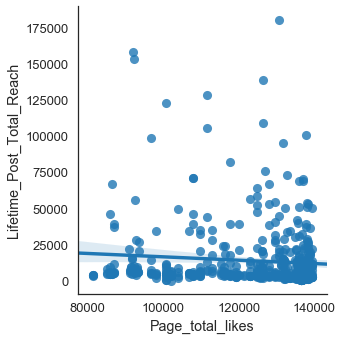

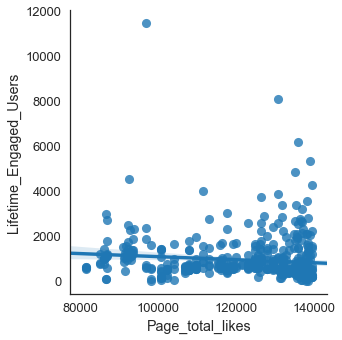

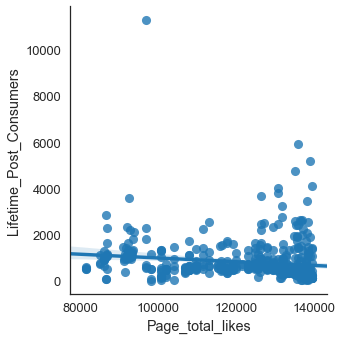

In [30]:
sns.lmplot('Page_total_likes', 'Lifetime_Post_Total_Reach', data=fb)
sns.lmplot('Page_total_likes', 'Lifetime_Engaged_Users', data=fb)
sns.lmplot('Page_total_likes', 'Lifetime_Post_Consumers', data=fb)

# Impressions and Post Consumers

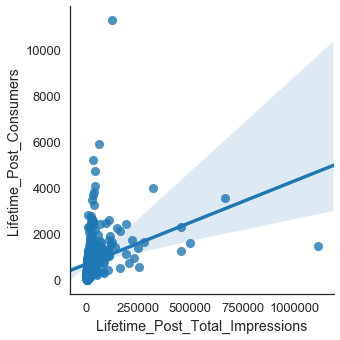

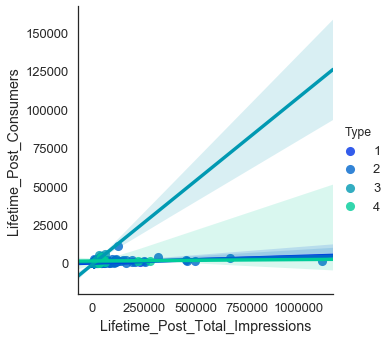

In [31]:
sns.lmplot('Lifetime_Post_Total_Impressions', 'Lifetime_Post_Consumers', data=fb)
sns.lmplot('Lifetime_Post_Total_Impressions', 'Lifetime_Post_Consumers', data=fb, hue='Type', palette='winter')

'Link'=1     'Photo'=2     'Status'=3     'Video'=4

In [35]:
slope, intercept = np.polyfit((fb.Lifetime_Post_Total_Impressions), (fb.Lifetime_Post_Consumers), 1)
print(slope)
print(intercept)

0.0036218068197977397
691.6174117634187


for every 1k impressions you get 3.62 post consumers

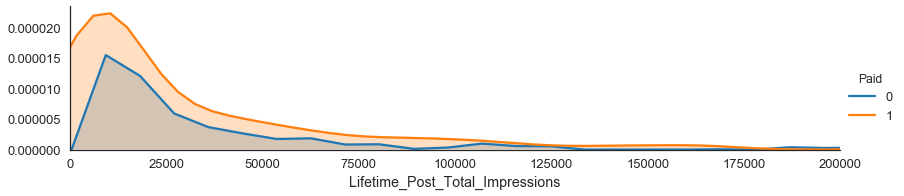

In [38]:
fig = sns.FacetGrid(fb, hue='Paid', aspect=4)
fig.map(sns.kdeplot, 'Lifetime_Post_Total_Impressions', shade=True)
#oldest = fb['Lifetime_Post_Total_Impressions'].max()
oldest = 200000
fig.set(xlim=(0,oldest))
fig.add_legend()

In [42]:
fb.groupby(['Paid']).mean()

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
Paid,,,,,,,,,,,,,,,,,,
0,123108.404432,2.069252,1.891967,7.072022,4.152355,8.024931,11829.988920,26591.481994,848.65651,745.149584,1293.803324,16637.462604,6058.448753,589.199446,6.481994,155.235457,24.947368,186.664820
1,123416.935252,2.086331,1.848921,6.949640,4.143885,7.359712,19288.158273,37362.942446,1106.52518,938.035971,1730.230216,17101.179856,7954.273381,663.971223,10.079137,235.647482,32.503597,278.230216


Paid posts average 10k more impressions

### Discretize Page Total Likes

In [31]:
def round_down(num, divisor):
    return num - (num%divisor)

In [32]:
#Counter(fb.Page_total_likes)

In [33]:
#fb.Page_total_likes = round_down(fb.Page_total_likes,5000)

In [34]:
#Counter(fb.Page_total_likes)

In [35]:
fb.describe()

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,123194.176000,2.074000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.590000,27.048000,212.120000
std,16272.813214,0.429993,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.172528,42.511742,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,2.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.000000,10.000000,71.000000
50%,129600.000000,2.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,2.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000
max,139441.000000,4.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


# Create 3 Separate Data Sources

An important goal of digital marketing is reaching people. Therefore, as opposed to focusing on the types of impressions and engagements. The model and analysis will focus on the number of consumers, engaged users and users reached.

TR = Lifetime_Post_Total_Reach

EU = Lifetime_Engaged_Users

PC = Lifetime_Post_Consumers

PCI = Lifetime_Post_Consumers + Lifetime_Post_Total_Impressions

In [672]:
fb2=fb
fb3=fb

In [673]:
fb2 = fb2.drop('Lifetime_Post_Total_Impressions', 1)
fb2 = fb2.drop('Lifetime_Post_Consumptions', 1)
fb2 = fb2.drop('Lifetime_Post_Impressions_by_people_who_have_liked_your_Page', 1)
fb2 = fb2.drop('Lifetime_Post_reach_by_people_who_like_your_Page', 1)
fb2 = fb2.drop('Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post', 1)
fb2 = fb2.drop('comment', 1)
fb2 = fb2.drop('like', 1)
fb2 = fb2.drop('share', 1)
fb2 = fb2.drop('Total_Interactions', 1)

fb3 = fb3.drop('Lifetime_Post_Consumptions', 1)
fb3 = fb3.drop('Lifetime_Post_Impressions_by_people_who_have_liked_your_Page', 1)
fb3 = fb3.drop('Lifetime_Post_reach_by_people_who_like_your_Page', 1)
fb3 = fb3.drop('Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post', 1)
fb3 = fb3.drop('comment', 1)
fb3 = fb3.drop('like', 1)
fb3 = fb3.drop('share', 1)
fb3 = fb3.drop('Total_Interactions', 1)

In [674]:
fbTR = fb2
fbEU = fb2
fbPC = fb2
fbPCI = fb3

In [675]:
fbTR = fbTR.drop('Lifetime_Engaged_Users', 1)
fbTR = fbTR.drop('Lifetime_Post_Consumers', 1)

fbEU = fbEU.drop('Lifetime_Post_Total_Reach', 1)
fbEU = fbEU.drop('Lifetime_Post_Consumers', 1)

fbPC = fbPC.drop('Lifetime_Post_Total_Reach', 1)
fbPC = fbPC.drop('Lifetime_Engaged_Users', 1)

fbPCI = fbPCI.drop('Lifetime_Post_Total_Reach', 1)
fbPCI = fbPCI.drop('Lifetime_Engaged_Users', 1)

In [177]:
fbPC = fbPC.drop('Category', 1)
fbPC = fbPC.drop('Paid', 1)
                        

In [676]:
fbPCI.describe()

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Impressions,Lifetime_Post_Consumers
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,123194.176000,2.074000,1.880000,7.038000,4.150000,7.840000,0.278000,2.958595e+04,798.772000
std,16272.813214,0.429993,0.852675,3.307936,2.030701,4.368589,0.448462,7.680325e+04,882.505013
min,81370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.700000e+02,9.000000
25%,112676.000000,2.000000,1.000000,4.000000,2.000000,3.000000,0.000000,5.694750e+03,332.500000
50%,129600.000000,2.000000,2.000000,7.000000,4.000000,9.000000,0.000000,9.051000e+03,551.500000
75%,136393.000000,2.000000,3.000000,10.000000,6.000000,11.000000,1.000000,2.208550e+04,955.500000
max,139441.000000,4.000000,3.000000,12.000000,7.000000,23.000000,1.000000,1.110282e+06,11328.000000


### TR - X & y

In [677]:
X_TR, y_TR = fbTR.iloc[:, 0:7].values, fbTR.iloc[:, 7].values

In [679]:
X_TR = preprocessing.scale(X_TR) 

In [680]:
X_train_TR, X_test_TR, y_train_TR, y_test_TR = \
    train_test_split(X_TR, y_TR,
                    test_size=0.3,
                     random_state=0)

### EU - X & y

In [681]:
X_EU, y_EU = fbEU.iloc[:, 0:7].values, fbEU.iloc[:, 7].values

In [683]:
X_EU = preprocessing.scale(X_EU) 

In [684]:
X_train_EU, X_test_EU, y_train_EU, y_test_EU = \
    train_test_split(X_EU, y_EU,
                    test_size=0.3,
                     random_state=0)

### PC - X & y

In [685]:
X_PC, y_PC = fbPC.iloc[:, 0:7].values, fbPC.iloc[:, 7].values

In [687]:
X_PC = preprocessing.scale(X_PC) 

In [688]:
X_train_PC, X_test_PC, y_train_PC, y_test_PC = \
    train_test_split(X_PC, y_PC,
                    test_size=0.3,
                     random_state=0)

### PCI - X & y

In [689]:
X_PCI, y_PCI = fbPCI.iloc[:, 0:8].values, fbPCI.iloc[:, 8].values

In [691]:
X_PCI = preprocessing.scale(X_PCI) 

In [692]:
X_train_PCI, X_test_PCI, y_train_PCI, y_test_PCI = \
    train_test_split(X_PCI, y_PCI,
                    test_size=0.3,
                     random_state=0)

### Feature Labels

In [693]:
feat_labels = fbTR.columns[0:7]
print(feat_labels)

Index(['Page_total_likes', 'Type', 'Category', 'Post_Month', 'Post_Weekday',
       'Post_Hour', 'Paid'],
      dtype='object')


In [694]:
feat_labelsPCI = fbPCI.columns[0:8]
print(feat_labelsPCI)

Index(['Page_total_likes', 'Type', 'Category', 'Post_Month', 'Post_Weekday',
       'Post_Hour', 'Paid', 'Lifetime_Post_Total_Impressions'],
      dtype='object')


# TR = Lifetime_Post_Total_Reach

### RFECV

In [49]:
m = RFECV(RandomForestRegressor(n_estimators=500,
                                random_state=1))

In [50]:
m.fit(X_TR,y_TR)

RFECV(cv=None,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [51]:
m.score(X_TR,y_TR)

0.04466425324314849

In [52]:
m.n_features_ 

1

In [53]:
m.support_ 

array([ True, False, False, False, False, False, False])

In [54]:
m.ranking_  

array([1, 5, 7, 4, 3, 2, 6])

In [55]:
print(fbTR.columns[1]) 
print(fbTR.columns[2])
print(fbTR.columns[3])
print(fbTR.columns[6]) 

Type
Category
Post_Month
Paid


### Feature Importance

In [56]:
forest = RandomForestRegressor(n_estimators=500,
                                random_state=1)

In [57]:
forest.fit(X_train_TR,y_train_TR)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [58]:
importances = forest.feature_importances_

In [59]:
indices = np.argsort(importances)[::-1]

In [60]:
for f in range(X_train_TR.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) Post_Hour                      0.240087
 2) Post_Weekday                   0.225037
 3) Post_Month                     0.167042
 4) Page_total_likes               0.152613
 5) Paid                           0.074909
 6) Type                           0.070564
 7) Category                       0.069748


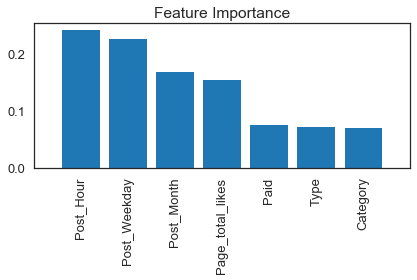

In [61]:
plt.title('Feature Importance')
plt.bar(range(X_train_TR.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train_TR.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_TR.shape[1]])
plt.tight_layout()

### Random Forest Model

In [66]:
modelRF_TR = RandomForestRegressor()
#Model Fitting
modelRF_TR.fit(X_train_TR,y_train_TR)
print(cross_val_score(modelRF_TR, X_train_TR, y_train_TR))
modelRF_TR.score(X_train_TR,y_train_TR)

[-0.71873297 -0.5963656  -0.08101033]


0.7650457989490105

Predictions

In [72]:
predictions_TR = modelRF_TR.predict(X_test_TR)
predRsquared_TR = r2_score(y_test_TR,predictions_TR)
rmse_TR = sqrt(mean_squared_error(y_test_TR, predictions_TR))
as_TR = explained_variance_score(y_test_TR, predictions_TR)
mae_TR = mean_absolute_error(y_test_TR, predictions_TR)
print('MAE: %.3f' % mae_TR)
print('Explained Variance Score: %.3f' % as_TR)
print('R Squared: %.3f' % predRsquared_TR)
print('RMSE: %.3f' % rmse_TR)

Explained Variance Score: 0.007
R Squared: -0.014
RMSE: 20948.345


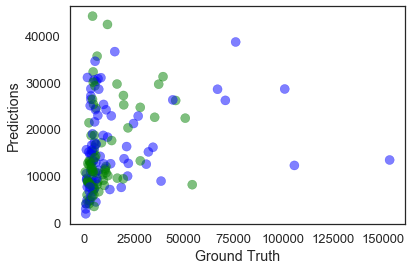

In [74]:
plt.scatter(y_test_TR, predictions_TR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune RF

In [69]:
crossvalidation = KFold(n=X_train_TR.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
train_scores, test_scores = validation_curve(modelRF_TR,  X_train_TR, y_train_TR,
                                           'n_estimators', param_range=[
                                               4000,4500,5000, 6000, 7000, 8000, 9000],
                                           cv=crossvalidation, scoring='r2',  n_jobs=1)
print('mean cv r2 %s' %np.mean(train_scores, axis=1))

mean cv r2 [0.83994689 0.8396603  0.84121965 0.8407822  0.84044976 0.84128132
 0.84202399]


In [66]:
modelRF_TR = RandomForestRegressor(n_estimators=2000)
scorer = 'r2'
crossvalidation = KFold(n=X_train_TR.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'max_features': [7, 'sqrt', 'log2', 'auto']
               , 'min_samples_leaf': [  11, 12, 13, 14, 15]
               , 'criterion': ['mse', 'mae']
               , "max_depth" :   [5, 10, 20, 30, 40 , 50, 60]
               , "min_samples_split" :   [ 2, 3,4,5 ]

              }
search_func = grid_search.GridSearchCV(estimator=modelRF_TR,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_TR, y_train_TR)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'criterion': 'mse', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'min_samples_split': 2}
Best r2: 0.034


In [53]:
modelRF_TR = RandomForestRegressor(n_estimators=4000, criterion = 'mse' , max_features = 'sqrt')
#Model Fitting
modelRF_TR.fit(X_train_TR,y_train_TR)
print(cross_val_score(modelRF_TR, X_train_TR, y_train_TR))
modelRF_TR.score(X_train_TR,y_train_TR)

[-0.37672058 -0.14578552 -0.03800043]


0.858164342630875

Predictions

In [54]:
predictions_TR = modelRF_TR.predict(X_test_TR)
predRsquared_TR = r2_score(y_test_TR,predictions_TR)
rmse_TR = sqrt(mean_squared_error(y_test_TR, predictions_TR))
as_TR = explained_variance_score(y_test_TR, predictions_TR)
mae_TR = mean_absolute_error(y_test_TR, predictions_TR)
print('MAE: %.3f' % mae_TR)
print('Explained Variance Score: %.3f' % as_TR)
print('R Squared: %.3f' % predRsquared_TR)
print('RMSE: %.3f' % rmse_TR)

MAE: 13052.282
Explained Variance Score: 0.006
R Squared: -0.015
RMSE: 20965.388


In [57]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_TR, predictions_TR)

247.80581291223922

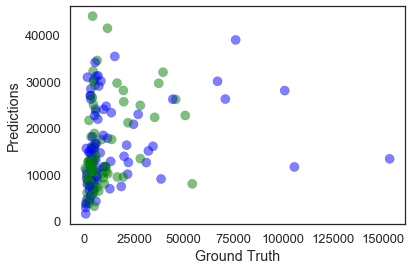

In [77]:
plt.scatter(y_test_TR, predictions_TR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### SVR Model 

In [78]:
modelSVR_TR = SVR()
#Model Fitting
modelSVR_TR.fit(X_train_TR,y_train_TR)
print(cross_val_score(modelSVR_TR, X_train_TR, y_train_TR))
modelSVR_TR.score(X_train_TR,y_train_TR)

[-0.21316045 -0.14793999 -0.16045947]


-0.14666349143940582

Predictions

In [79]:
predictions_TR = modelSVR_TR.predict(X_test_TR)
predRsquared_TR = r2_score(y_test_TR,predictions_TR)
rmse_TR = sqrt(mean_squared_error(y_test_TR, predictions_TR))
as_TR = explained_variance_score(y_test_TR, predictions_TR)
mae_TR = mean_absolute_error(y_test_TR, predictions_TR)
print('MAE: %.3f' % mae_TR)
print('Explained Variance Score: %.3f' % as_TR)
print('R Squared: %.3f' % predRsquared_TR)
print('RMSE: %.3f' % rmse_TR)

Explained Variance Score: 0.000
R Squared: -0.138
RMSE: 22196.819


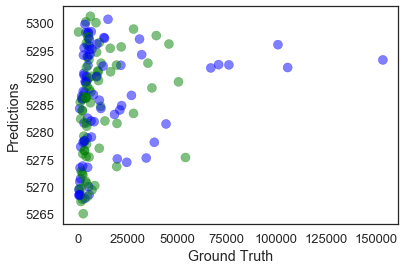

In [80]:
plt.scatter(y_test_TR, predictions_TR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune SVR

In [68]:
modelSVR_TR = SVR()
scorer = 'r2'
crossvalidation = KFold(n=X_train_TR.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'C': [1.0,2.0]
               , 'epsilon': [0.1,0.2]
               , 'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ]
               , "degree" :   [ 3, 4]
              }
search_func = grid_search.GridSearchCV(estimator=modelSVR_TR,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_TR, y_train_TR)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'C': 2.0, 'degree': 3, 'epsilon': 0.2, 'kernel': 'linear'}
Best r2: -0.152


Predictions

In [58]:
modelSVR_TR = SVR(C=7.0, epsilon = 2, kernel  = 'poly', degree = 9)
#Model Fitting
modelSVR_TR.fit(X_train_TR,y_train_TR)
print(cross_val_score(modelSVR_TR, X_train_TR, y_train_TR))
modelSVR_TR.score(X_train_TR,y_train_TR)

[-0.37808821 -0.14534587 -0.1377804 ]


-0.03515177917704815

In [59]:
predictions_TR = modelSVR_TR.predict(X_test_TR)
predRsquared_TR = r2_score(y_test_TR,predictions_TR)
rmse_TR = sqrt(mean_squared_error(y_test_TR, predictions_TR))
as_TR = explained_variance_score(y_test_TR, predictions_TR)
mae_TR = mean_absolute_error(y_test_TR, predictions_TR)
print('MAE: %.3f' % mae_TR)
print('Explained Variance Score: %.3f' % as_TR)
print('R Squared: %.3f' % predRsquared_TR)
print('RMSE: %.3f' % rmse_TR)

MAE: 9800.712
Explained Variance Score: 0.048
R Squared: -0.066
RMSE: 21485.673


In [60]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_TR, predictions_TR)

94.78412774893505

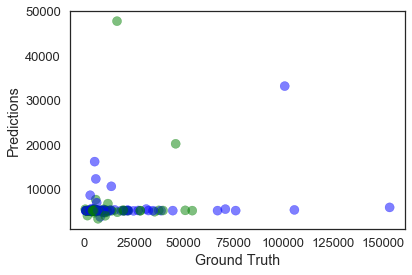

In [64]:
plt.scatter(y_test_TR, predictions_TR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Linear Regression Model 

In [65]:
modelLR_TR = LinearRegression()
#Model Fitting
modelLR_TR.fit(X_train_TR,y_train_TR)
print(cross_val_score(modelLR_TR, X_train_TR, y_train_TR))
modelLR_TR.score(X_train_TR,y_train_TR)

[-0.0491629 -0.0797481  0.0228058]


0.07829663998880065

Predictions

In [66]:
predictions_TR = modelLR_TR.predict(X_test_TR)
predRsquared_TR = r2_score(y_test_TR,predictions_TR)
rmse_TR = sqrt(mean_squared_error(y_test_TR, predictions_TR))
as_TR = explained_variance_score(y_test_TR, predictions_TR)
mae_TR = mean_absolute_error(y_test_TR, predictions_TR)
print('MAE: %.3f' % mae_TR)
print('Explained Variance Score: %.3f' % as_TR)
print('R Squared: %.3f' % predRsquared_TR)
print('RMSE: %.3f' % rmse_TR)

Explained Variance Score: 0.037
R Squared: 0.031
RMSE: 20487.747


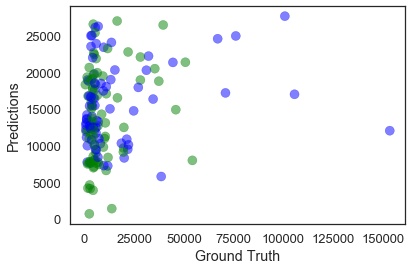

In [67]:
plt.scatter(y_test_TR, predictions_TR, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# EU = Lifetime_Engaged_Users

### RFECV

In [69]:
m = RFECV(RandomForestRegressor(n_estimators=500,
                                random_state=1))

In [70]:
m.fit(X_EU,y_EU)

RFECV(cv=None,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [71]:
m.score(X_EU,y_EU)

0.8412196385209962

In [72]:
m.n_features_ 

6

In [73]:
m.support_ 

array([ True,  True, False,  True,  True,  True,  True])

In [74]:
m.ranking_  

array([1, 1, 2, 1, 1, 1, 1])

In [75]:
print(fbEU.columns[1]) 
print(fbEU.columns[2])
print(fbEU.columns[3])
print(fbEU.columns[4])
print(fbEU.columns[5])
print(fbEU.columns[6]) 

Type
Category
Post_Month
Post_Weekday
Post_Hour
Paid


### Feature Importance

In [76]:
forest = RandomForestRegressor(n_estimators=500,
                                random_state=1)

In [77]:
forest.fit(X_train_EU,y_train_EU)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [78]:
importances = forest.feature_importances_

In [79]:
indices = np.argsort(importances)[::-1]

In [80]:
for f in range(X_train_EU.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) Post_Weekday                   0.239202
 2) Post_Hour                      0.179742
 3) Page_total_likes               0.156734
 4) Type                           0.145370
 5) Post_Month                     0.135824
 6) Category                       0.073710
 7) Paid                           0.069418


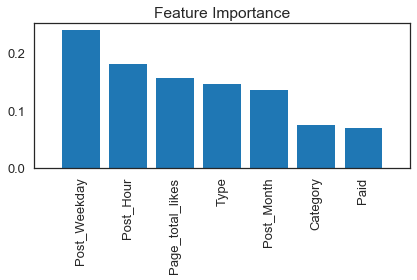

In [81]:
plt.title('Feature Importance')
plt.bar(range(X_train_EU.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train_EU.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_EU.shape[1]])
plt.tight_layout()

### Random Forest Model 

In [68]:
modelRF_EU = RandomForestRegressor()
#Model Fitting
modelRF_EU.fit(X_train_EU,y_train_EU)
print(cross_val_score(modelRF_EU, X_train_EU, y_train_EU))
modelRF_EU.score(X_train_EU,y_train_EU)

[-0.47622585 -0.76229031  0.00781737]


0.8115281959461803

Predictions

In [70]:
predictions_EU = modelRF_EU.predict(X_test_EU)
predRsquared_EU = r2_score(y_test_EU,predictions_EU)
rmse_EU = sqrt(mean_squared_error(y_test_EU, predictions_EU))
as_EU = explained_variance_score(y_test_EU, predictions_EU)
mae_EU = mean_absolute_error(y_test_EU, predictions_EU)
print('MAE: %.3f' % mae_EU)
print('Explained Variance Score: %.3f' % as_EU)
print('R Squared: %.3f' % predRsquared_EU)
print('RMSE: %.3f' % rmse_EU)

Explained Variance Score: -0.467
R Squared: -0.568
RMSE: 1023.959


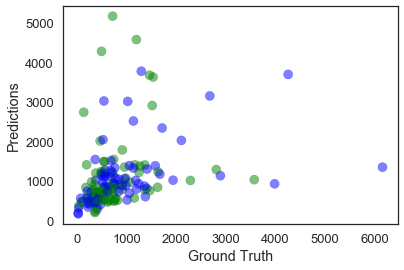

In [71]:
plt.scatter(y_test_EU, predictions_EU, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune RF

In [86]:
crossvalidation = KFold(n=X_train_EU.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
train_scores, test_scores = validation_curve(modelRF_EU,  X_train_EU, y_train_EU,
                                           'n_estimators', param_range=[
                                               1000,1500,2000,2500,3000,3500,4000,4500,5000],
                                           cv=crossvalidation, scoring='r2',  n_jobs=1)
print('mean cv r2 %s' %np.mean(train_scores, axis=1))

mean cv r2 [0.86105818 0.86258827 0.86047707 0.86277863 0.86049323 0.86274539
 0.86201501 0.86268077 0.86029721]


In [87]:
modelRF_EU = RandomForestRegressor(n_estimators=2500)
scorer = 'r2'
crossvalidation = KFold(n=X_train_EU.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'max_features': [7, 'sqrt', 'log2', 'auto']
               , 'min_samples_leaf': [  11, 12, 13, 14, 15]
               , 'criterion': ['mse', 'mae']
               , "max_depth" :   [3, 4,5]
               , "min_samples_split" :   [ 2, 3,4,5 ]

              }
search_func = grid_search.GridSearchCV(estimator=modelRF_EU,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_EU, y_train_EU)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'criterion': 'mse', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 11, 'min_samples_split': 4}
Best r2: 0.201


In [61]:
modelRF_EU = RandomForestRegressor(n_estimators=2500, criterion = 'mse')
#Model Fitting
modelRF_EU.fit(X_train_EU,y_train_EU)
print(cross_val_score(modelRF_EU, X_train_EU, y_train_EU))
modelRF_EU.score(X_train_EU,y_train_EU)

[-0.47380443 -0.18063757  0.01342352]


0.8747926546670384

Predictions

In [62]:
predictions_EU = modelRF_EU.predict(X_test_EU)
predRsquared_EU = r2_score(y_test_EU,predictions_EU)
rmse_EU = sqrt(mean_squared_error(y_test_EU, predictions_EU))
as_EU = explained_variance_score(y_test_EU, predictions_EU)
mae_EU = mean_absolute_error(y_test_EU, predictions_EU)
print('MAE: %.3f' % mae_EU)
print('Explained Variance Score: %.3f' % as_EU)
print('R Squared: %.3f' % predRsquared_EU)
print('RMSE: %.3f' % rmse_EU)

MAE: 586.333
Explained Variance Score: -0.269
R Squared: -0.378
RMSE: 960.024


In [64]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_EU, predictions_EU)

157.0124515554978

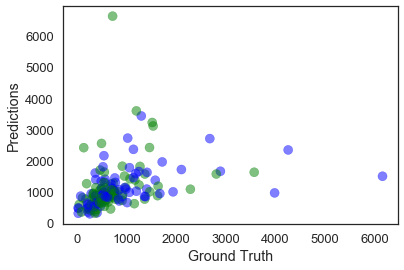

In [74]:
plt.scatter(y_test_EU, predictions_EU, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### SVR Model

In [75]:
modelSVR_EU = SVR()
#Model Fitting
modelSVR_EU.fit(X_train_EU,y_train_EU)
print(cross_val_score(modelSVR_EU, X_train_EU, y_train_EU))
modelSVR_EU.score(X_train_EU,y_train_EU)

[-0.07087258 -0.07635886 -0.13799417]


-0.08495265493486759

Prediction

In [76]:
predictions_EU = modelSVR_EU.predict(X_test_EU)
predRsquared_EU = r2_score(y_test_EU,predictions_EU)
rmse_EU = sqrt(mean_squared_error(y_test_EU, predictions_EU))
as_EU = explained_variance_score(y_test_EU, predictions_EU)
mae_EU = mean_absolute_error(y_test_EU, predictions_EU)
print('MAE: %.3f' % mae_EU)
print('Explained Variance Score: %.3f' % as_EU)
print('R Squared: %.3f' % predRsquared_EU)
print('RMSE: %.3f' % rmse_EU)

Explained Variance Score: 0.007
R Squared: -0.066
RMSE: 844.426


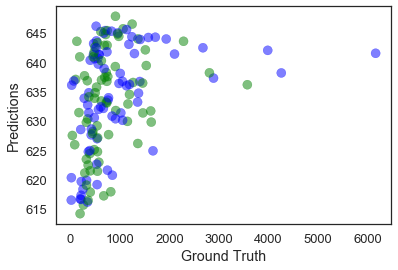

In [77]:
plt.scatter(y_test_EU, predictions_EU, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune SVR

In [79]:
modelSVR_EU = SVR()
scorer = 'r2'
crossvalidation = KFold(n=X_train_EU.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'C': [2.5,3.0]
               , 'epsilon': [ 2.5,3.0]
               , 'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ]
               , "degree" :   [ 4,5]
              }
search_func = grid_search.GridSearchCV(estimator=modelSVR_EU,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_EU, y_train_EU)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'C': 3.0, 'degree': 4, 'epsilon': 2.5, 'kernel': 'linear'}
Best r2: 0.007


In [188]:
modelSVR_EU = SVR(C=150.0, epsilon = 15, kernel = 'poly', degree = 20)
#Model Fitting
modelSVR_EU.fit(X_train_EU,y_train_EU)
print(cross_val_score(modelSVR_EU, X_train_EU, y_train_EU))
modelSVR_EU.score(X_train_EU,y_train_EU)

[-3.40037423e+06 -9.68022403e+01 -8.10100015e+04]


0.6166484465413641

Prediction

In [189]:
predictions_EU = modelSVR_EU.predict(X_test_EU)
predRsquared_EU = r2_score(y_test_EU,predictions_EU)
rmse_EU = sqrt(mean_squared_error(y_test_EU, predictions_EU))
as_EU = explained_variance_score(y_test_EU, predictions_EU)
mae_EU = mean_absolute_error(y_test_EU, predictions_EU)
print('MAE: %.3f' % mae_EU)
print('Explained Variance Score: %.3f' % as_EU)
print('R Squared: %.3f' % predRsquared_EU)
print('RMSE: %.3f' % rmse_EU)

MAE: 282121.475
Explained Variance Score: -8547979.892
R Squared: -8651170.853
RMSE: 2405073.984


In [67]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_EU, predictions_EU)

41694.81560930982

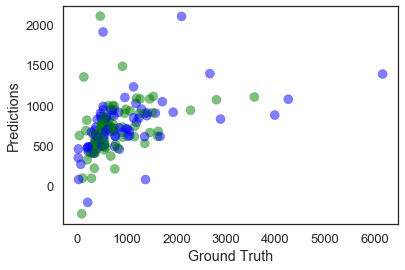

In [147]:
plt.scatter(y_test_EU, predictions_EU, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Linear Regression Model

In [87]:
modelLR_EU = LinearRegression()
#Model Fitting
modelLR_EU.fit(X_train_EU,y_train_EU)
print(cross_val_score(modelLR_EU, X_train_EU, y_train_EU))
modelLR_EU.score(X_train_EU,y_train_EU)

[-0.12057454  0.16387542  0.06720941]


0.17583455739074494

Predictions

In [90]:
predictions_EU = modelLR_EU.predict(X_test_EU)
predRsquared_EU = r2_score(y_test_EU,predictions_EU)
rmse_EU = sqrt(mean_squared_error(y_test_EU, predictions_EU))
as_EU = explained_variance_score(y_test_EU, predictions_EU)
mae_EU = mean_absolute_error(y_test_EU, predictions_EU)
print('MAE: %.3f' % mae_EU)
print('Explained Variance Score: %.3f' % as_EU)
print('R Squared: %.3f' % predRsquared_EU)
print('RMSE: %.3f' % rmse_EU)

Explained Variance Score: 0.184
R Squared: 0.165
RMSE: 747.130


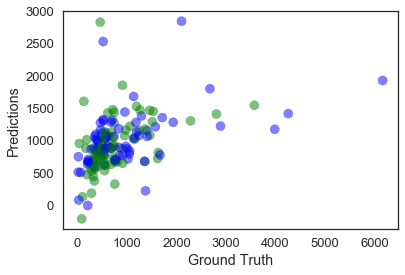

In [91]:
plt.scatter(y_test_EU, predictions_EU, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# PC = Lifetime_Post_Consumers

### RFECV

In [256]:
m = RFECV(RandomForestRegressor(n_estimators=500,
                                random_state=1))

In [257]:
m.fit(X_PC,y_PC)

RFECV(cv=None,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [258]:
m.score(X_PC,y_PC)

0.8682082937679817

In [259]:
m.n_features_ 

7

In [260]:
m.support_ 

array([ True,  True,  True,  True,  True,  True,  True])

In [261]:
m.ranking_  

array([1, 1, 1, 1, 1, 1, 1])

In [262]:
print(fbPC.columns[2]) 

Category


### Feature Importance

In [263]:
forest = RandomForestRegressor(n_estimators=500,
                                random_state=1)

In [264]:
forest.fit(X_train_PC,y_train_PC)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [265]:
importances = forest.feature_importances_

In [266]:
indices = np.argsort(importances)[::-1]

In [267]:
for f in range(X_train_PC.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) Page_total_likes               0.290810
 2) Type                           0.198049
 3) Post_Weekday                   0.193425
 4) Post_Hour                      0.146795
 5) Post_Month                     0.072080
 6) Category                       0.057049
 7) Paid                           0.041793


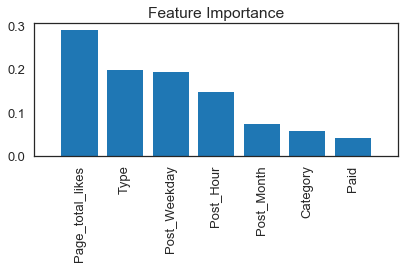

In [268]:
plt.title('Feature Importance')
plt.bar(range(X_train_PC.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train_PC.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_PC.shape[1]])
plt.tight_layout()

### Random Forest Model

In [269]:
modelRF_PC = RandomForestRegressor()
#Model Fitting
modelRF_PC.fit(X_train_PC,y_train_PC)
print(cross_val_score(modelRF_PC, X_train_PC, y_train_PC))
modelRF_PC.score(X_train_PC,y_train_PC)

[-0.11363629 -1.2487071   0.07059764]


0.8821806455100855

Predictions

In [270]:
predictions_PC = modelRF_PC.predict(X_test_PC)
predRsquared_PC = r2_score(y_test_PC,predictions_PC)
rmse_PC = sqrt(mean_squared_error(y_test_PC, predictions_PC))
as_PC = explained_variance_score(y_test_PC, predictions_PC)
mae_PC = mean_absolute_error(y_test_PC, predictions_PC)
print('MAE: %.3f' % mae_PC)
print('Explained Variance Score: %.3f' % as_PC)
print('R Squared: %.3f' % predRsquared_PC)
print('RMSE: %.3f' % rmse_PC)

MAE: 486.097
Explained Variance Score: -0.504
R Squared: -0.590
RMSE: 940.537


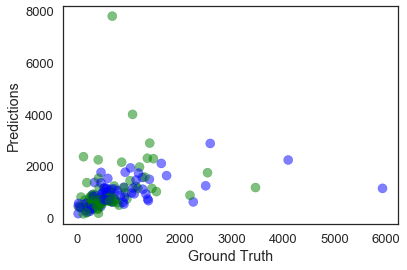

In [271]:
plt.scatter(y_test_PC, predictions_PC, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune RF

In [104]:
crossvalidation = KFold(n=X_train_PC.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
train_scores, test_scores = validation_curve(modelRF_PC,  X_train_PC, y_train_PC,
                                           'n_estimators', param_range=[
                                               1000,1500,2000,2500,3000,3500,4000,4500,5000],
                                           cv=crossvalidation, scoring='r2',  n_jobs=1)
print('mean cv r2 %s' %np.mean(train_scores, axis=1))

mean cv r2 [0.86988671 0.87009564 0.87292452 0.87384509 0.86995036 0.87217287
 0.86984977 0.87391962 0.87374942]


In [105]:
modelRF_PC = RandomForestRegressor(n_estimators=4500)
scorer = 'r2'
crossvalidation = KFold(n=X_train_PC.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'max_features': [7, 'sqrt', 'log2', 'auto']
               , 'min_samples_leaf': [  25, 20, 30]
               , 'criterion': ['mse', 'mae']
               , "max_depth" :   [3, 4,5]
               , "min_samples_split" :   [ 2, 3,4 ]

              }
search_func = grid_search.GridSearchCV(estimator=modelRF_PC,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_PC, y_train_PC)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'criterion': 'mse', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 4}
Best r2: 0.037


In [272]:
modelRF_PC = RandomForestRegressor(n_estimators=4500, criterion = 'mse')
#Model Fitting
modelRF_PC.fit(X_train_PC,y_train_PC)
print(cross_val_score(modelRF_PC, X_train_PC, y_train_PC))
modelRF_PC.score(X_train_PC,y_train_PC)

[-0.10196088 -0.12588415  0.0568899 ]


0.8869592407396797

Predictions

In [273]:
predictions_PC = modelRF_PC.predict(X_test_PC)
predRsquared_PC = r2_score(y_test_PC,predictions_PC)
rmse_PC = sqrt(mean_squared_error(y_test_PC, predictions_PC))
as_PC = explained_variance_score(y_test_PC, predictions_PC)
mae_PC = mean_absolute_error(y_test_PC, predictions_PC)
print('MAE: %.3f' % mae_PC)
print('Explained Variance Score: %.3f' % as_PC)
print('R Squared: %.3f' % predRsquared_PC)
print('RMSE: %.3f' % rmse_PC)

MAE: 460.660
Explained Variance Score: -0.207
R Squared: -0.282
RMSE: 844.502


In [274]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_PC, predictions_PC)

149.31839657169846

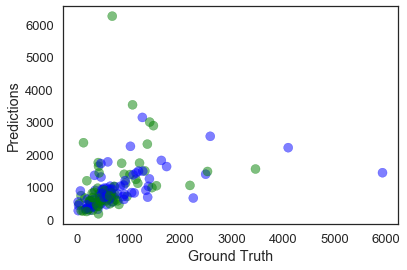

In [275]:
plt.scatter(y_test_PC, predictions_PC, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### SVR Model 

In [276]:
modelSVR_PC = SVR()
#Model Fitting
modelSVR_PC.fit(X_train_PC,y_train_PC)
print(cross_val_score(modelSVR_PC, X_train_PC, y_train_PC))
modelSVR_PC.score(X_train_PC,y_train_PC)

[-0.05364929 -0.06469283 -0.14069002]


-0.07903415716314188

Predictions

In [277]:
predictions_PC = modelSVR_PC.predict(X_test_PC)
predRsquared_PC = r2_score(y_test_PC,predictions_PC)
rmse_PC = sqrt(mean_squared_error(y_test_PC, predictions_PC))
as_PC = explained_variance_score(y_test_PC, predictions_PC)
mae_PC = mean_absolute_error(y_test_PC, predictions_PC)
print('MAE: %.3f' % mae_PC)
print('Explained Variance Score: %.3f' % as_PC)
print('R Squared: %.3f' % predRsquared_PC)
print('RMSE: %.3f' % rmse_PC)

MAE: 419.334
Explained Variance Score: 0.009
R Squared: -0.063
RMSE: 768.806


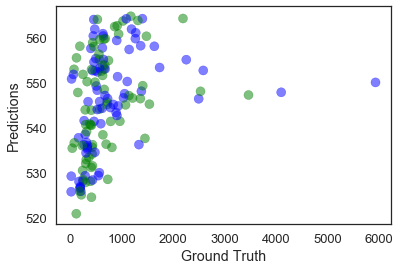

In [278]:
plt.scatter(y_test_PC, predictions_PC, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune SVR 

In [215]:
modelSVR_PC = SVR()
scorer = 'r2'
crossvalidation = KFold(n=X_train_PC.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'C': [2.5,3.0]
               , 'epsilon': [ 2.5,3.0]
               , 'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ]
               , "degree" :   [ 4,5]
              }
search_func = grid_search.GridSearchCV(estimator=modelSVR_PC,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_PC, y_train_PC)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'C': 3.0, 'degree': 4, 'epsilon': 3.0, 'kernel': 'linear'}
Best r2: 0.040


In [216]:
modelSVR_PC = SVR(C=1500.0, epsilon = 60.0, kernel = 'rbf', gamma = .13, degree = 5)
#Model Fitting
modelSVR_PC.fit(X_train_PC,y_train_PC)
print(cross_val_score(modelSVR_PC, X_train_PC, y_train_PC))
modelSVR_PC.score(X_train_PC,y_train_PC)

[0.25840064 0.45685299 0.04075426]


0.24887186074995613

Predictions

In [217]:
predictions_PC = modelSVR_PC.predict(X_test_PC)
predRsquared_PC = r2_score(y_test_PC,predictions_PC)
rmse_PC = sqrt(mean_squared_error(y_test_PC, predictions_PC))
as_PC = explained_variance_score(y_test_PC, predictions_PC)
mae_PC = mean_absolute_error(y_test_PC, predictions_PC)
print('MAE: %.3f' % mae_PC)
print('Explained Variance Score: %.3f' % as_PC)
print('R Squared: %.3f' % predRsquared_PC)
print('RMSE: %.3f' % rmse_PC)

MAE: 320.455
Explained Variance Score: 0.256
R Squared: 0.238
RMSE: 651.179


In [218]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_PC, predictions_PC)

92.22388169539192

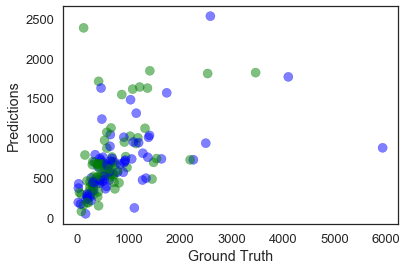

In [176]:
plt.scatter(y_test_PC, predictions_PC, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Linear Regression Model

In [107]:
modelLR_PC = LinearRegression()
#Model Fitting
modelLR_PC.fit(X_train_PC,y_train_PC)
print(cross_val_score(modelLR_PC, X_train_PC, y_train_PC))
modelLR_PC.score(X_train_PC,y_train_PC)

[-0.12071563  0.26143929  0.10168832]


0.23157381641562555

Predictions

In [108]:
predictions_PC = modelLR_PC.predict(X_test_PC)
predRsquared_PC = r2_score(y_test_PC,predictions_PC)
rmse_PC = sqrt(mean_squared_error(y_test_PC, predictions_PC))
as_PC = explained_variance_score(y_test_PC, predictions_PC)
mae_PC = mean_absolute_error(y_test_PC, predictions_PC)
print('MAE: %.3f' % mae_PC)

print('Explained Variance Score: %.3f' % as_PC)
print('R Squared: %.3f' % predRsquared_PC)
print('RMSE: %.3f' % rmse_PC)

Explained Variance Score: 0.205
R Squared: 0.192
RMSE: 670.357


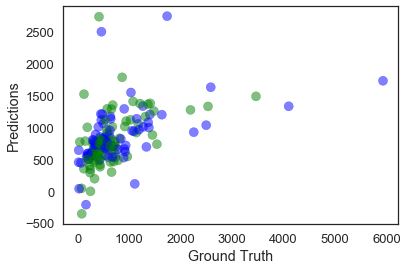

In [109]:
plt.scatter(y_test_PC, predictions_PC, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# PCI = Lifetime_Post_Consumers with Impressions

Before Removing Features

### Random Forest Model

In [326]:
modelRF_PCI = RandomForestRegressor()
#Model Fitting
modelRF_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelRF_PCI, X_train_PCI, y_train_PCI))
modelRF_PCI.score(X_train_PCI,y_train_PCI)

[-2.03246154  0.57001538  0.2406571 ]


0.7697202803785181

Predictions

In [327]:
predictions_PCI = modelRF_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 323.347
Explained Variance Score: 0.321
R Squared: 0.292
RMSE: 627.645


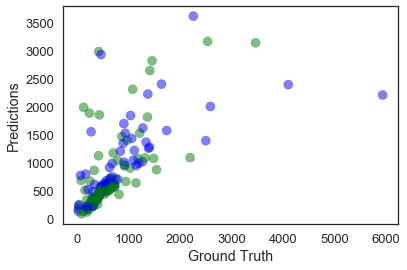

In [328]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune RF

In [652]:
crossvalidation = KFold(n=X_train_PCI.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
train_scores, test_scores = validation_curve(modelRF_PCI,  X_train_PCI, y_train_PCI,
                                           'n_estimators', param_range=[
                                               1000,1500,2000,2500,3000,3500,4000,4500,5000],
                                           cv=crossvalidation, scoring='r2',  n_jobs=1)
print('mean cv r2 %s' %np.mean(train_scores, axis=1))

mean cv r2 [0.91916676 0.91944592 0.91789229 0.9164085  0.91860129 0.91696371
 0.91941447 0.91808459 0.91735326]


In [105]:
modelRF_PCI = RandomForestRegressor(n_estimators=2000)
scorer = 'r2'
crossvalidation = KFold(n=X_train_PCI.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'max_features': [8, 'sqrt', 'log2', 'auto']
               , 'min_samples_leaf': [  25, 20, 30]
               , 'criterion': ['mse', 'mae']
               , "max_depth" :   [3, 4,5]
               , "min_samples_split" :   [ 2, 3,4 ]

              }
search_func = grid_search.GridSearchCV(estimator=modelRF_PCI,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_PCI, y_train_PCI)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'criterion': 'mse', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 4}
Best r2: 0.037


In [332]:
modelRF_PCI = RandomForestRegressor(n_estimators=2000, criterion = 'mse')
#Model Fitting
modelRF_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelRF_PCI, X_train_PCI, y_train_PCI))
modelRF_PCI.score(X_train_PCI,y_train_PCI)

[-0.5014021   0.64994478  0.26811966]


0.9125421544481267

Predictions

In [333]:
predictions_PCI = modelRF_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 275.186
Explained Variance Score: 0.364
R Squared: 0.336
RMSE: 607.828


In [334]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_PC, predictions_PC)

147.51723675231568

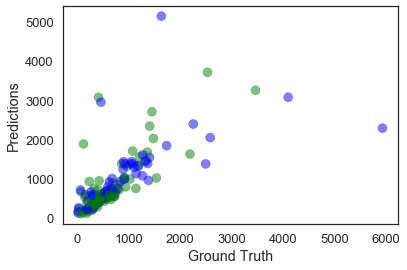

In [335]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### SVR Model 

In [336]:
modelSVR_PCI = SVR()
#Model Fitting
modelSVR_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelSVR_PCI, X_train_PCI, y_train_PCI))
modelSVR_PCI.score(X_train_PCI,y_train_PCI)

[-0.05004498 -0.06253002 -0.14004541]


-0.07719055346807058

Predictions

In [337]:
predictions_PCI = modelRF_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 275.186
Explained Variance Score: 0.364
R Squared: 0.336
RMSE: 607.828


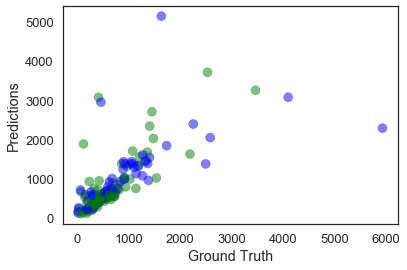

In [338]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune SVR 

In [215]:
modelSVR_PCI = SVR()
scorer = 'r2'
crossvalidation = KFold(n=X_train_PCI.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'C': [2.5,3.0]
               , 'epsilon': [ 2.5,3.0]
               , 'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ]
               , "degree" :   [ 4,5]
              }
search_func = grid_search.GridSearchCV(estimator=modelSVR_PCI,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_PCI, y_train_PCI)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'C': 3.0, 'degree': 4, 'epsilon': 3.0, 'kernel': 'linear'}
Best r2: 0.040


In [647]:
modelSVR_PCI = NuSVR(C=25000.0, nu = .8, kernel = 'rbf')
#Model Fitting
modelSVR_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelSVR_PCI, X_train_PCI, y_train_PCI))
modelSVR_PCI.score(X_train_PCI,y_train_PCI)

[0.20869554 0.04292688 0.02827554]


0.8529557866301464

Predictions

In [648]:
predictions_PCI = modelSVR_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 267.692
Explained Variance Score: 0.457
R Squared: 0.457
RMSE: 549.712


In [651]:
modelSVR_PCI.get_params

<bound method BaseEstimator.get_params of NuSVR(C=25000.0, cache_size=200, coef0=0.0, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.8, shrinking=True, tol=0.001,
   verbose=False)>

In [650]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_PCI, predictions_PCI)

83.91801908248266

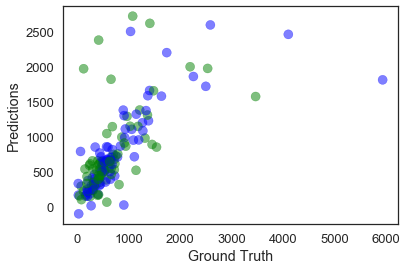

In [598]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Linear Regression Model

In [501]:
modelLR_PCI = LinearRegression()
#Model Fitting
modelLR_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelLR_PCI, X_train_PCI, y_train_PCI))
modelLR_PCI.score(X_train_PCI,y_train_PCI)

[-0.55542879  0.39736533  0.16988023]


0.29794105414643146

Predictions

In [502]:
predictions_PCI = modelLR_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 386.532
Explained Variance Score: 0.261
R Squared: 0.255
RMSE: 643.673


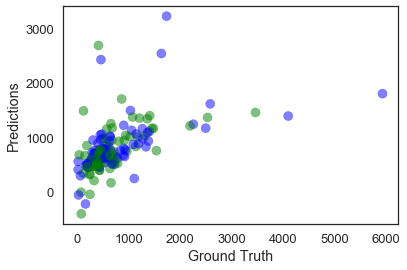

In [503]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Feature Selection

### RFECV

In [653]:
m = RFECV(RandomForestRegressor(n_estimators=1500,
                                random_state=1))

In [654]:
m.fit(X_PCI,y_PCI)

RFECV(cv=None,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [655]:
m.score(X_PCI,y_PCI)

0.9162171184293245

In [656]:
m.n_features_ 

6

In [657]:
m.support_ 

array([ True,  True, False,  True,  True,  True, False,  True])

In [658]:
m.ranking_  

array([1, 1, 2, 1, 1, 1, 3, 1])

In [667]:
print(fbPCI.columns[2]) 
print(fbPCI.columns[6])

Category
Paid


### Feature Importance

In [660]:
forest = RandomForestRegressor(n_estimators=1500,
                                random_state=1)

In [661]:
forest.fit(X_train_PCI,y_train_PCI)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [662]:
importances = forest.feature_importances_

In [663]:
indices = np.argsort(importances)[::-1]

In [664]:
print(indices.shape[0])

8


In [665]:
for f in range(X_train_PCI.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labelsPCI[indices[f]],
                          importances[indices[f]]))

 1) Lifetime_Post_Total_Impressions 0.496944
 2) Page_total_likes               0.134170
 3) Type                           0.109181
 4) Post_Hour                      0.102930
 5) Post_Weekday                   0.081510
 6) Post_Month                     0.046275
 7) Paid                           0.015223
 8) Category                       0.013766


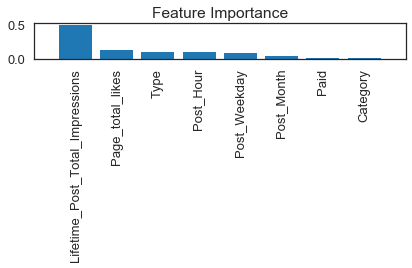

In [666]:
plt.title('Feature Importance')
plt.bar(range(X_train_PCI.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train_PCI.shape[1]),
          feat_labelsPCI[indices], rotation=90)
plt.xlim([-1, X_train_PCI.shape[1]])
plt.tight_layout()

### Remove Features

In [695]:
fbPCI = fbPCI.drop('Category', 1)
fbPCI = fbPCI.drop('Paid', 1)

In [702]:
X_PCI, y_PCI = fbPCI.iloc[:, 0:6].values, fbPCI.iloc[:, 6].values

In [704]:
X_PCI = preprocessing.scale(X_PCI) 

In [705]:
X_train_PCI, X_test_PCI, y_train_PCI, y_test_PCI = \
    train_test_split(X_PCI, y_PCI,
                    test_size=0.3,
                     random_state=0)

In [706]:
feat_labelsPCI = fbPCI.columns[0:6]
print(feat_labelsPCI)

Index(['Page_total_likes', 'Type', 'Post_Month', 'Post_Weekday', 'Post_Hour',
       'Lifetime_Post_Total_Impressions'],
      dtype='object')


### Random Forest Model

In [707]:
modelRF_PCI = RandomForestRegressor()
#Model Fitting
modelRF_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelRF_PCI, X_train_PCI, y_train_PCI))
modelRF_PCI.score(X_train_PCI,y_train_PCI)

[-0.66177438  0.67314943  0.27467745]


0.915376824346423

Predictions

In [708]:
predictions_PCI = modelRF_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 315.790
Explained Variance Score: 0.118
R Squared: 0.074
RMSE: 717.557


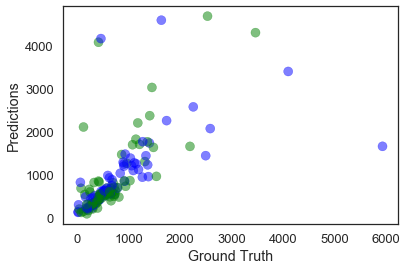

In [709]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune RF

In [710]:
crossvalidation = KFold(n=X_train_PCI.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
train_scores, test_scores = validation_curve(modelRF_PCI,  X_train_PCI, y_train_PCI,
                                           'n_estimators', param_range=[
                                               1000,1500,2000,2500,3000,3500,4000,4500,5000],
                                           cv=crossvalidation, scoring='r2',  n_jobs=1)
print('mean cv r2 %s' %np.mean(train_scores, axis=1))

mean cv r2 [0.91614351 0.91807021 0.91580207 0.91718069 0.91824522 0.91975713
 0.91810185 0.91904707 0.91832642]


In [105]:
modelRF_PCI = RandomForestRegressor(n_estimators=3500)
scorer = 'r2'
crossvalidation = KFold(n=X_train_PCI.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'max_features': [8, 'sqrt', 'log2', 'auto']
               , 'min_samples_leaf': [  25, 20, 30]
               , 'criterion': ['mse', 'mae']
               , "max_depth" :   [3, 4,5]
               , "min_samples_split" :   [ 2, 3,4 ]

              }
search_func = grid_search.GridSearchCV(estimator=modelRF_PCI,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_PCI, y_train_PCI)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'criterion': 'mse', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 4}
Best r2: 0.037


In [711]:
modelRF_PCI = RandomForestRegressor(n_estimators=3500, criterion = 'mse')
#Model Fitting
modelRF_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelRF_PCI, X_train_PCI, y_train_PCI))
modelRF_PCI.score(X_train_PCI,y_train_PCI)

[-0.36346786  0.64897468  0.267534  ]


0.9180247590667474

Predictions

In [712]:
predictions_PCI = modelRF_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 275.593
Explained Variance Score: 0.342
R Squared: 0.317
RMSE: 616.284


In [713]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_PC, predictions_PC)

147.51723675231568

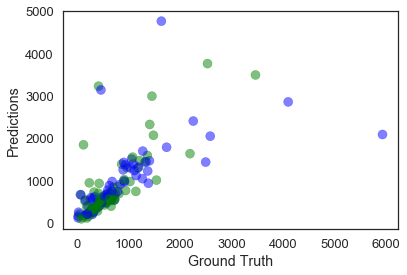

In [714]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### SVR Model 

In [715]:
modelSVR_PCI = SVR()
#Model Fitting
modelSVR_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelSVR_PCI, X_train_PCI, y_train_PCI))
modelSVR_PCI.score(X_train_PCI,y_train_PCI)

[-0.04588028 -0.06046213 -0.1403769 ]


-0.0741206229479876

Predictions

In [716]:
predictions_PCI = modelRF_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 275.593
Explained Variance Score: 0.342
R Squared: 0.317
RMSE: 616.284


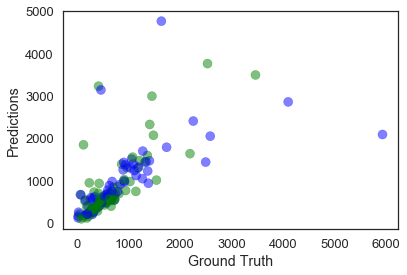

In [717]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Tune SVR -- WINNER!!!

In [215]:
modelSVR_PCI = SVR()
scorer = 'r2'
crossvalidation = KFold(n=X_train_PCI.shape[0], n_folds=3,
                       shuffle=True, random_state=1)
search_grid = {'C': [2.5,3.0]
               , 'epsilon': [ 2.5,3.0]
               , 'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ]
               , "degree" :   [ 4,5]
              }
search_func = grid_search.GridSearchCV(estimator=modelSVR_PCI,
                                      param_grid=search_grid, scoring=scorer, n_jobs=1,
                                      cv=crossvalidation)
search_func.fit(X_train_PCI, y_train_PCI)
print('Best parameters: %s' % search_func.best_params_)
print('Best r2: %.3f' % search_func.best_score_)

Best parameters: {'C': 3.0, 'degree': 4, 'epsilon': 3.0, 'kernel': 'linear'}
Best r2: 0.040


In [864]:
modelSVR_PCI = NuSVR(C=78000.0, nu=.8, kernel = 'rbf')
#Model Fitting
modelSVR_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelSVR_PCI, X_train_PCI, y_train_PCI))
modelSVR_PCI.score(X_train_PCI,y_train_PCI)

[-0.10848946  0.17348511 -0.00236433]


0.9073567154056098

Predictions

In [865]:
predictions_PCI = modelSVR_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 235.181
Explained Variance Score: 0.697
R Squared: 0.697
RMSE: 410.804


In [837]:
modelSVR_PCI.get_params

<bound method BaseEstimator.get_params of NuSVR(C=78000.0, cache_size=200, coef0=0.0, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.85, shrinking=True, tol=0.001,
   verbose=False)>

In [838]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test_PCI, predictions_PCI)

62.176228649525356

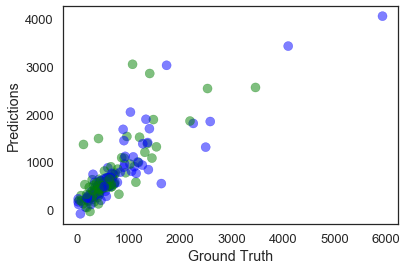

In [839]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Linear Regression Model

In [723]:
modelLR_PCI = LinearRegression()
#Model Fitting
modelLR_PCI.fit(X_train_PCI,y_train_PCI)
print(cross_val_score(modelLR_PCI, X_train_PCI, y_train_PCI))
modelLR_PCI.score(X_train_PCI,y_train_PCI)

[-0.42774508  0.42170255  0.16121755]


0.2845390468164518

Predictions

In [724]:
predictions_PCI = modelLR_PCI.predict(X_test_PCI)
predRsquared_PCI = r2_score(y_test_PCI,predictions_PCI)
rmse_PCI = sqrt(mean_squared_error(y_test_PCI, predictions_PCI))
as_PCI = explained_variance_score(y_test_PCI, predictions_PCI)
mae_PCI = mean_absolute_error(y_test_PCI, predictions_PCI)
print('MAE: %.3f' % mae_PCI)
print('Explained Variance Score: %.3f' % as_PCI)
print('R Squared: %.3f' % predRsquared_PCI)
print('RMSE: %.3f' % rmse_PCI)

MAE: 374.487
Explained Variance Score: 0.275
R Squared: 0.270
RMSE: 637.201


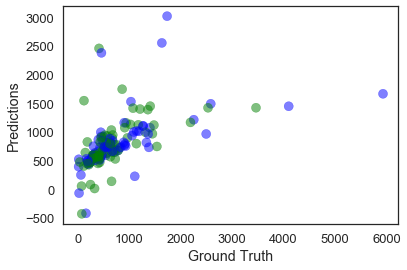

In [725]:
plt.scatter(y_test_PCI, predictions_PCI, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();